In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets._samples_generator import make_blobs
import random



In [2]:
df = pd.read_csv('mnist-1.csv')



# PCA

Perform PCA on the dataset to reduce each sample into a 10-dimensional feature vector. Show the covariance matrix of the transformed data. Please also copy your code snippet here.


In [8]:
class pca:
    def __init__(self, x, n_components = None):
        self.x = x
        self.n_components = n_components
        self.num_features = x.shape[0]
        self.ori_feat = x.shape[1]
        self.cov_mat = None
        self.P = None
        self.y = None

    def cov(self):
        self.cov_mat = np.cov(self.x.T)
        return self.cov_mat
    def standardization(self):
        return self.x - np.mean(self.x, axis=0)
    def reduce_feature(self):
        x_meaned = self.standardization()
        x_cov = self.cov()
        eigen_val, eigen_vec = np.linalg.eig(x_cov)
        sort_index = np.argsort(eigen_val[::-1]) #Use np.argsort()

        sorted_eigenval = eigen_val[sort_index]
        sorted_eigenvector = eigen_vec[:,sort_index]

        self.P = sorted_eigenvector[:,:self.n_components]
        self.y = np.dot(self.P.T, x_meaned.T).T
        return self.y

pca_1 = pca(df, 10)
new_df = pca_1.reduce_feature()
print(f'The input x has shape {df.shape}, and the transformed x has shape {new_df.shape}')
print(f'The sum of the input covariance matrix is {round(np.sum(pca_1.cov_mat), 5)}.')
print(f'The sum of the transformed covariance matrix is {round(np.sum(np.cov(new_df.T)).real, 5)}.')

The input x has shape (5999, 785), and the transformed x has shape (5999, 10)
The sum of the input covariance matrix is 1127.46503.
The sum of the transformed covariance matrix is 10.66681.


# K-Means

Perform k-means clustering to cluster the dataset (without applying PCA) into 10 groups. Please copy your code snippet here.

In [55]:
def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    x = x.values
    np.random.seed(2024)
    clusters = []

    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) > 0:
                new_clusters_center[i] = np.mean(x[clusters[i]], axis=0)

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):
            return clusters, new_clusters_center

        # d. update the centroid
        loss.append(abs(np.sum(new_clusters_center - cluster_center)))
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center


loss = []
clusters, cluster_center = k_means(df, 10)



# visualization

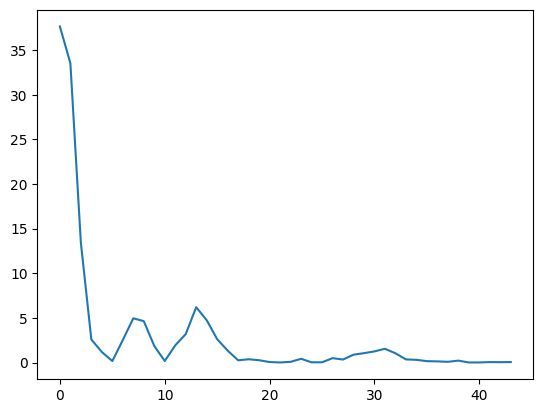

In [56]:
def plot(x, k, clusters:list, loss=[]):
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)

    for i in range(k):
        ax1.scatter(x[clusters[i],0],x[clusters[i],1])

    if loss:
        f2 = plt.figure()
        ax2 = f2.add_subplot(111)
        ax2.plot([i for i in range(len(loss))], loss)
        ax2.set_title('Epochs vs Loss')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Loss')
    plt.show()

plt.plot(loss)

# find optimal k

In [63]:
from sklearn.metrics import silhouette_score

def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    x = x.values
    np.random.seed(2024)
    clusters = []
    result = 0
    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) > 0:
                new_clusters_center[i] = np.mean(x[clusters[i]], axis=0)

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):
            for i in range(k):

                cluster_points = x[clusters[i]]  # Get all points in cluster `i`
                print(cluster_points)
                centroid = cluster_center[i]     # Get the centroid of cluster `i`
                total_distance = np.sum(np.linalg.norm(cluster_points - centroid, ord = 2, axis=1))
                result += total_distance

            return clusters, new_clusters_center, result

        # d. update the centroid
        loss.append(abs(np.sum(new_clusters_center - cluster_center)))
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center, result


loss = []
result_arr = []

#for k in range(2, 30):
#  kmeans = KMeans(n_clusters = k).fit(x)
#  labels = kmeans.labels_
#  sil.append(silhouette_score(x, labels, metric = 'euclidean'))


clusters, cluster_center, result = k_means(df, 10)
#for k in range(2,40):
#    clusters, cluster_center, result = k_means(df, k)
#    result_arr.append(result)

#plt.plot(result_arr)

[[3. 0. 0. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]
 ...
 [3. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]]
[[7. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 ...
 [9. 0. 0. ... 0. 0. 0.]
 [7. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[8. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]
 ...
 [8. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]]
[[6. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 ...
 [6. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ...

In [81]:
from sklearn.metrics import silhouette_score

def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    x = x.values
    np.random.seed(2024)
    clusters = []
    datapoint = []
    cluster_arr = []    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) > 0:
                new_clusters_center[i] = np.mean(x[clusters[i]], axis=0)

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        
        if np.all(new_clusters_center == cluster_center):

            for i in range(k):
                for data in clusters[i]:
                    cluster_points = data  # Get all points in cluster `i`
                    datapoint.append(cluster_points)
                centroid = cluster_center[i]     # Get the centroid of cluster `i`
                cluster_arr.append(centroid)


            return clusters, new_clusters_center, datapoint, cluster_arr

        # d. update the centroid
        loss.append(abs(np.sum(new_clusters_center - cluster_center)))
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center, datapoint, cluster_arr


loss = []
result_arr = []

clusters, cluster_center, datapoint, cluster_arr = k_means(df, 10)
print(len(datapoint))
#result_arr.append(silhouette_score(datapoint, cluster_arr, metric = 'euclidean'))

#for k in range(2, 30):
#  kmeans = KMeans(n_clusters = k).fit(x)
#  labels = kmeans.labels_
#  result_arr.append(silhouette_score(datapoint, cluster_arr, metric = 'euclidean'))


#for k in range(2,40):
#    clusters, cluster_center, result = k_means(df, k)
#    result_arr.append(result)

#plt.plot(result_arr)

5999


In [82]:

print(datapoint)


[6, 9, 11, 26, 29, 43, 48, 49, 73, 85, 97, 106, 110, 119, 129, 131, 133, 134, 135, 137, 148, 156, 160, 178, 180, 181, 197, 202, 214, 218, 223, 234, 235, 238, 241, 243, 253, 254, 265, 272, 278, 280, 283, 290, 297, 305, 315, 320, 326, 327, 329, 331, 340, 355, 360, 375, 391, 395, 404, 419, 424, 432, 451, 473, 478, 479, 485, 489, 494, 495, 503, 511, 513, 543, 545, 548, 553, 556, 580, 612, 619, 621, 628, 642, 644, 651, 674, 678, 694, 698, 714, 718, 730, 747, 750, 751, 756, 759, 766, 767, 770, 788, 798, 804, 807, 810, 814, 829, 831, 835, 836, 839, 844, 855, 856, 860, 865, 866, 873, 874, 877, 885, 889, 894, 908, 911, 923, 952, 955, 959, 963, 969, 974, 982, 991, 997, 1020, 1031, 1034, 1054, 1061, 1067, 1070, 1076, 1103, 1107, 1118, 1129, 1143, 1144, 1149, 1150, 1157, 1161, 1205, 1209, 1217, 1221, 1225, 1275, 1289, 1297, 1311, 1314, 1319, 1323, 1335, 1339, 1355, 1377, 1405, 1408, 1419, 1427, 1428, 1431, 1435, 1448, 1468, 1469, 1473, 1475, 1481, 1485, 1489, 1513, 1515, 1523, 1525, 1532, 1550, 15